In [1]:
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
# Load the data
df = pd.read_pickle('../data_cabspotting/cabspotting.pkl')

In [3]:
north, south, east, west = 38.04691, 37.276830000000004, -121.95391333333333, -122.62829

In [5]:
kde = KernelDensity(bandwidth=0.003, metric='haversine')
kde.fit(df[['longitude', 'latitude']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.003, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='haversine',
       metric_params=None, rtol=0)

In [6]:
start_positions = kde.sample(500)

In [10]:
start_positions[:5]

array([[-122.42006588,   37.77809552],
       [-122.42190448,   37.78917983],
       [-122.40927545,   37.79515401],
       [-122.41003084,   37.80095694],
       [-122.40943521,   37.78651361]])

In [4]:
# Load the small OSMNX graph
streets_small = ox.load_graphml('san_francisco_streets_all.graphml', folder='../osmnx_data')

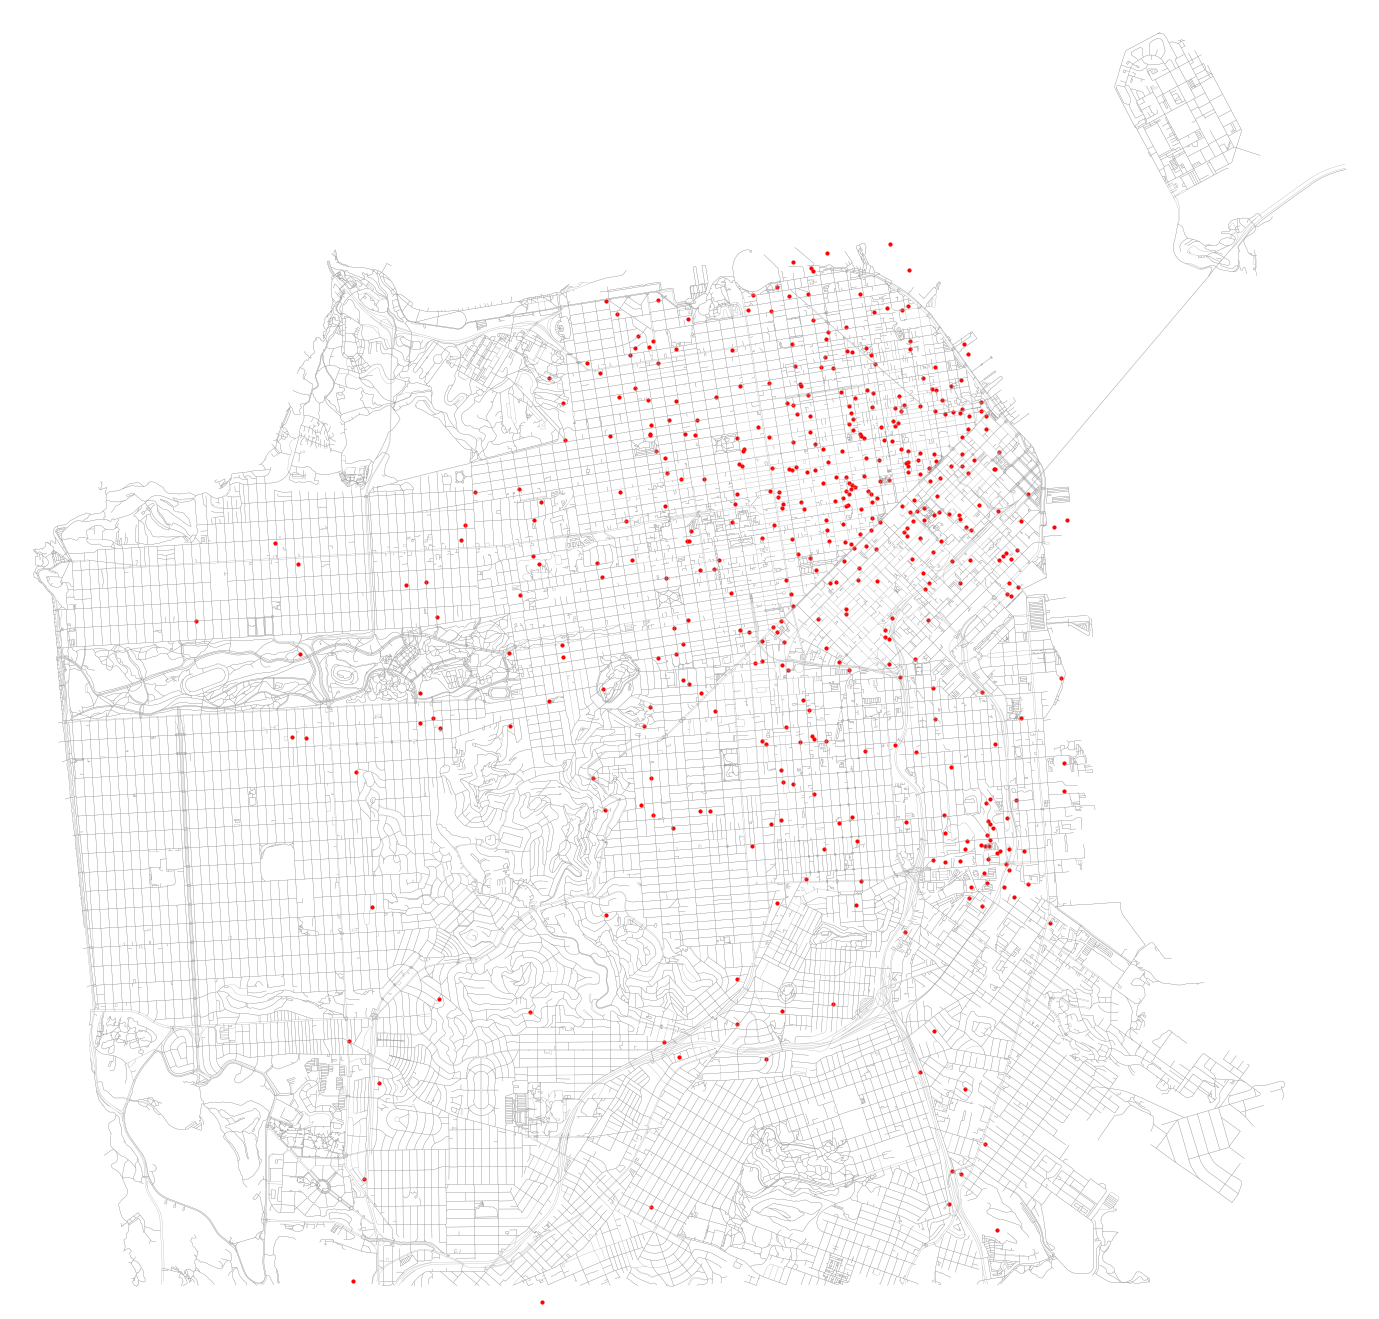

In [14]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(start_positions[:, 0], start_positions[:, 1], c='#ff0000', s=10.0, alpha=1.0)

In [15]:
start_positions2 = kde.sample(500)

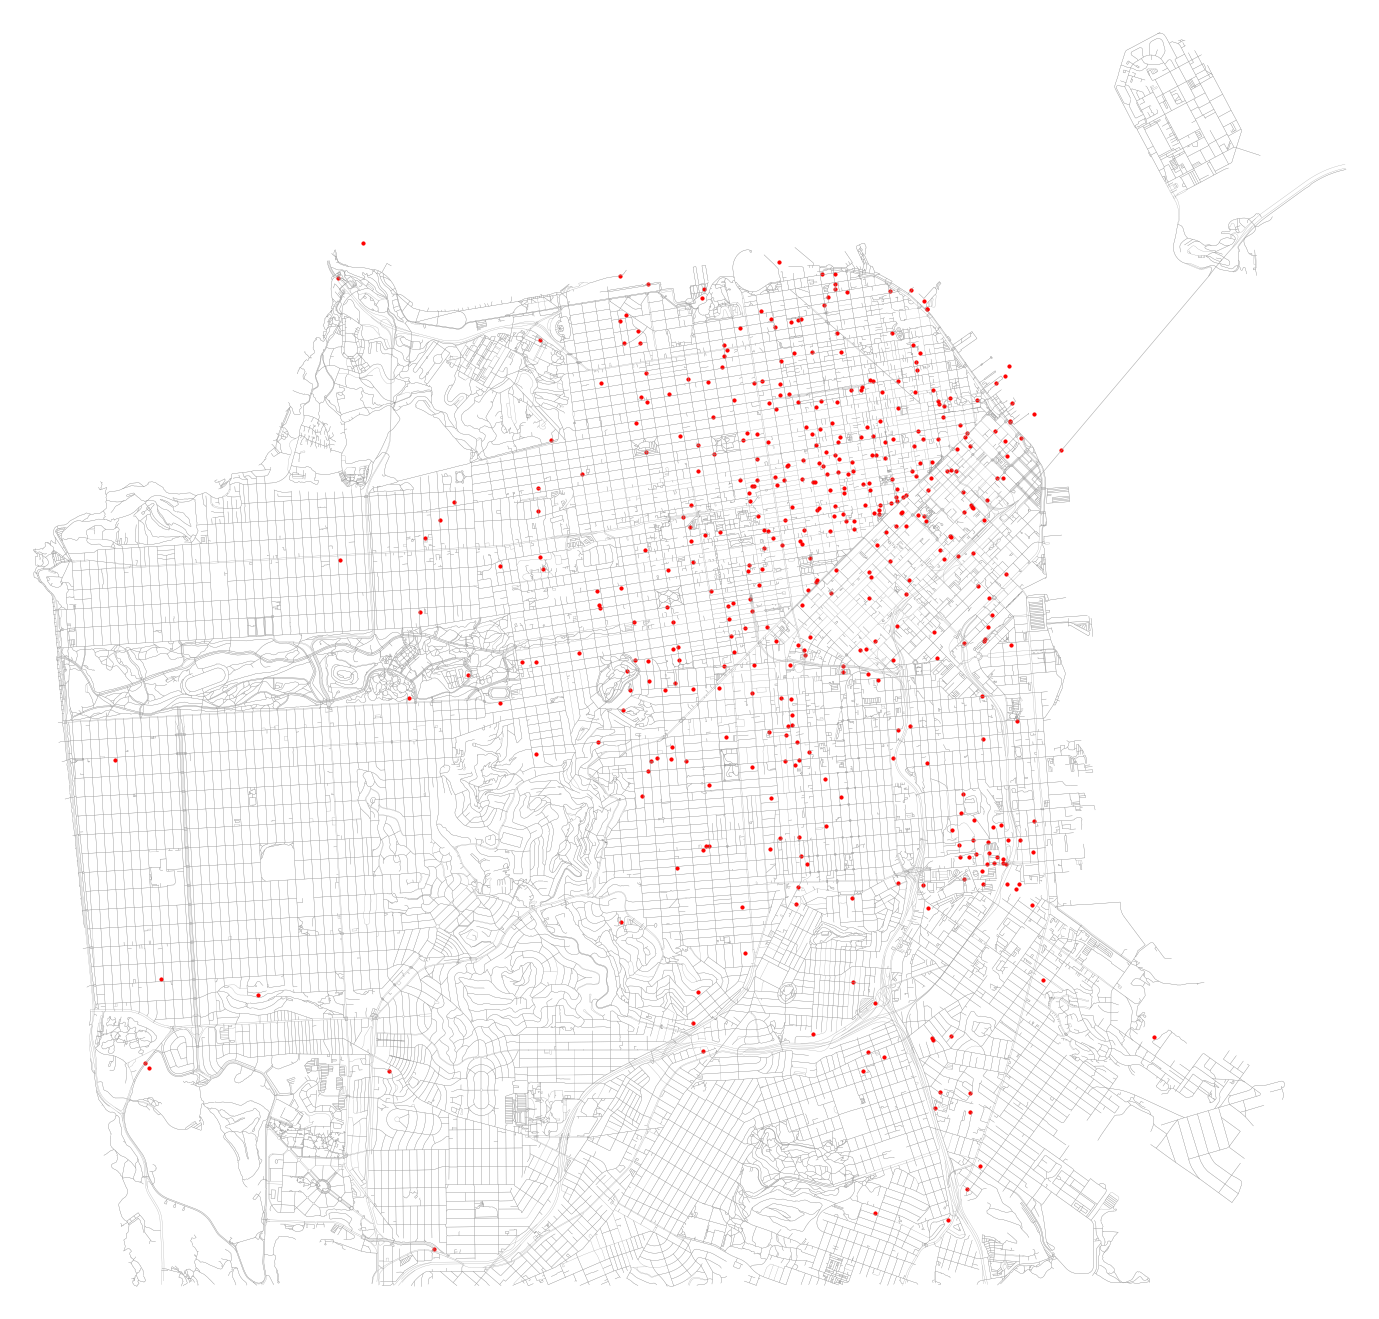

In [16]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(start_positions2[:, 0], start_positions2[:, 1], c='#ff0000', s=10.0, alpha=1.0)

In [38]:
kde_hb = KernelDensity(bandwidth=0.00003, metric='haversine')
kde_hb.fit(df[['longitude', 'latitude']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=3e-05, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='haversine',
       metric_params=None, rtol=0)

In [39]:
start_positions_hb = kde_hb.sample(500)

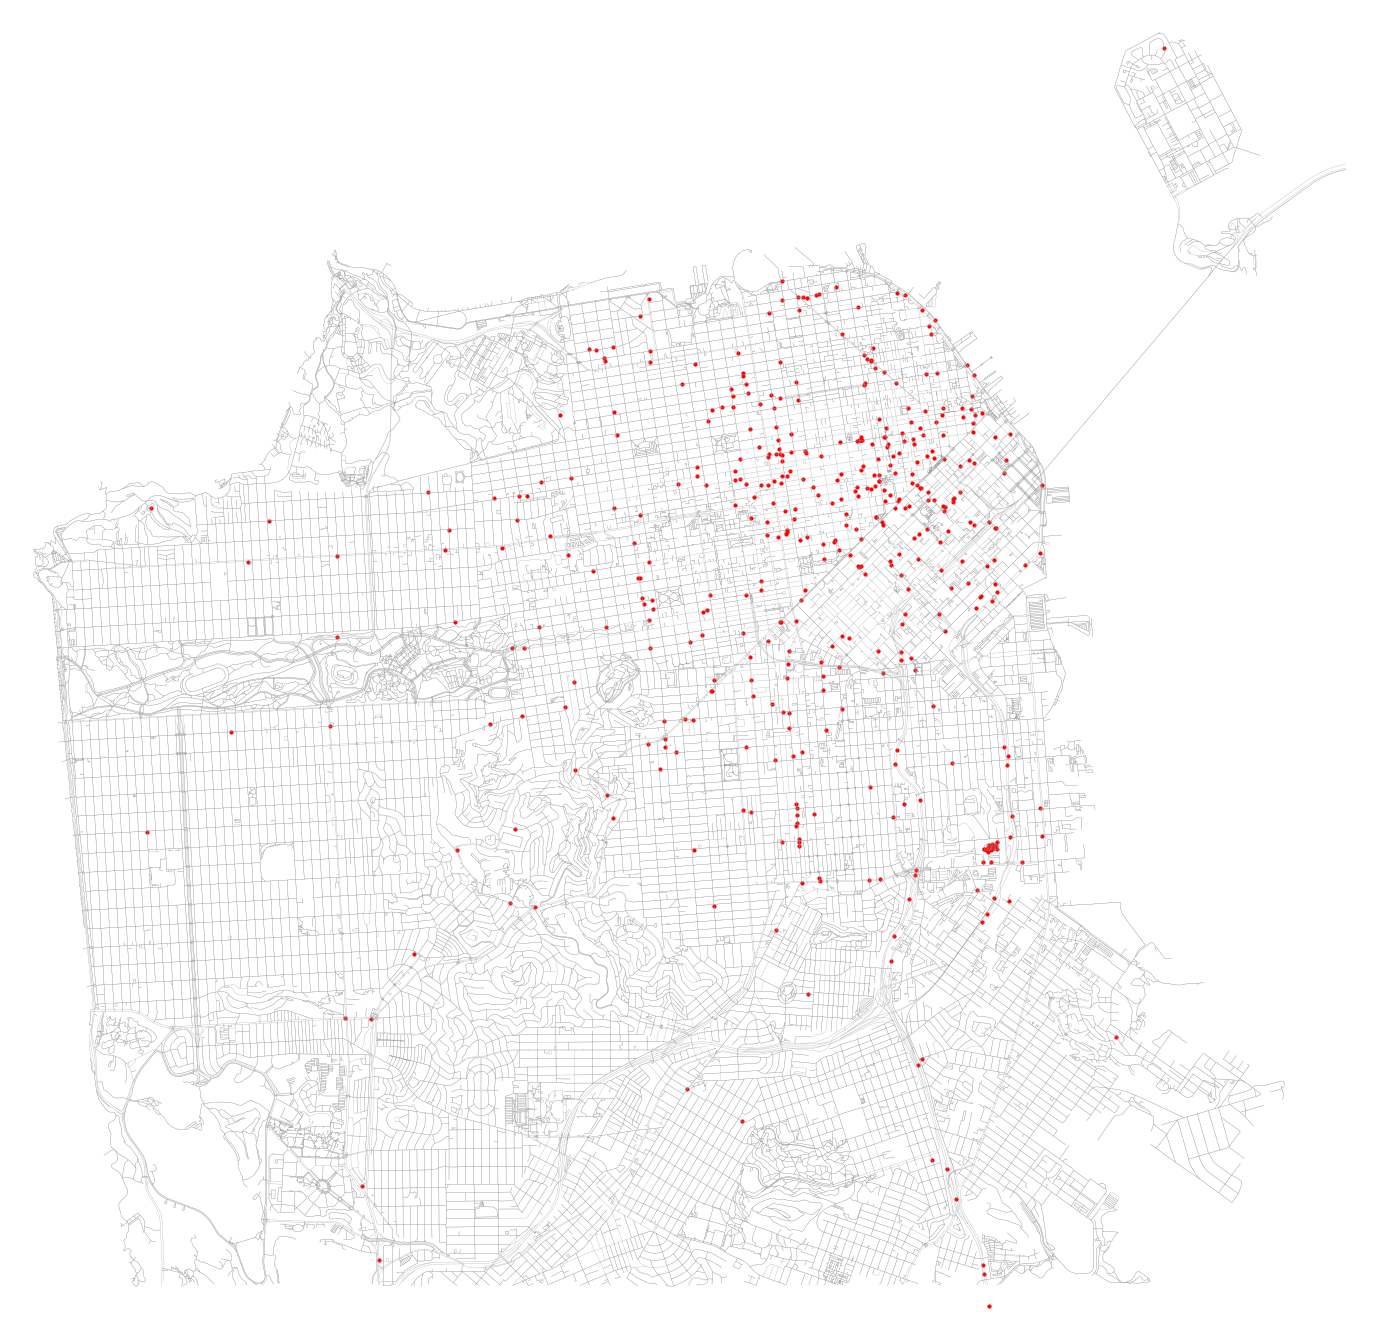

In [40]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(start_positions_hb[:, 0], start_positions_hb[:, 1], c='#ff0000', s=10.0, alpha=1.0)

In [5]:
# Load the OSMNX graph
streets = ox.load_graphml('cabspotting_streets_all.graphml', folder='../osmnx_data')

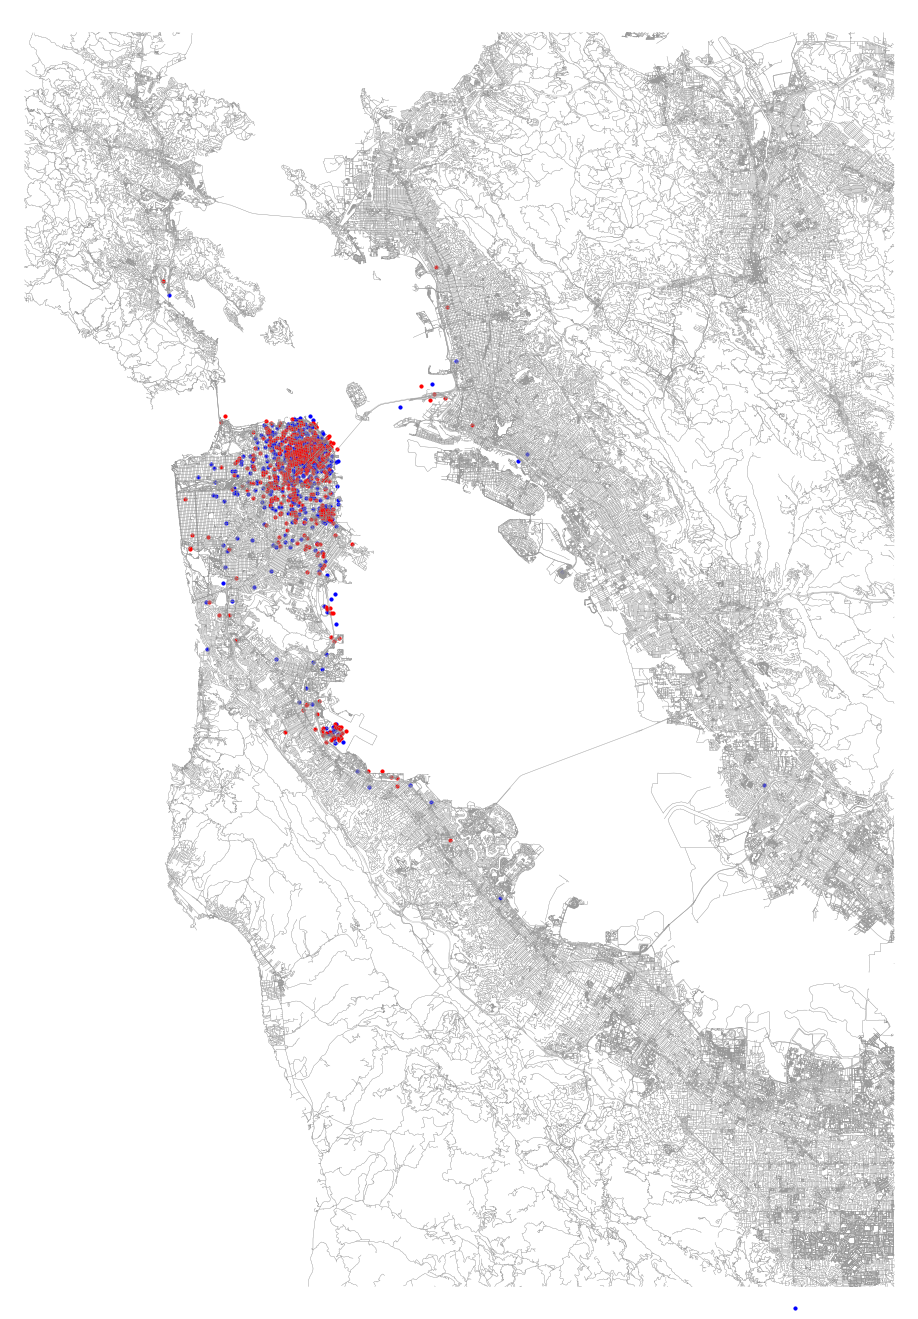

In [18]:
fig, ax = ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(start_positions[:, 0], start_positions[:, 1], c='#0000ff', s=10.0, alpha=1.0)
ax.scatter(start_positions2[:, 0], start_positions2[:, 1], c='#ff0000', s=10.0, alpha=1.0)

In [6]:
original_starts = df.reset_index().sort_values(by='time').groupby('user').first()

In [27]:
original_starts.head()

time  latitude  longitude  occupied
user                                                       
abboip   2008-05-17 14:12:10  37.75153 -122.39447         0
abcoij   2008-05-17 23:11:30  37.80346 -122.41466         1
abdremlu 2008-05-17 13:19:13  37.75521 -122.39093         0
abgibo   2008-05-17 10:00:20  37.77330 -122.43740         1
abjoolaw 2008-05-17 13:51:00  37.75159 -122.39747         0

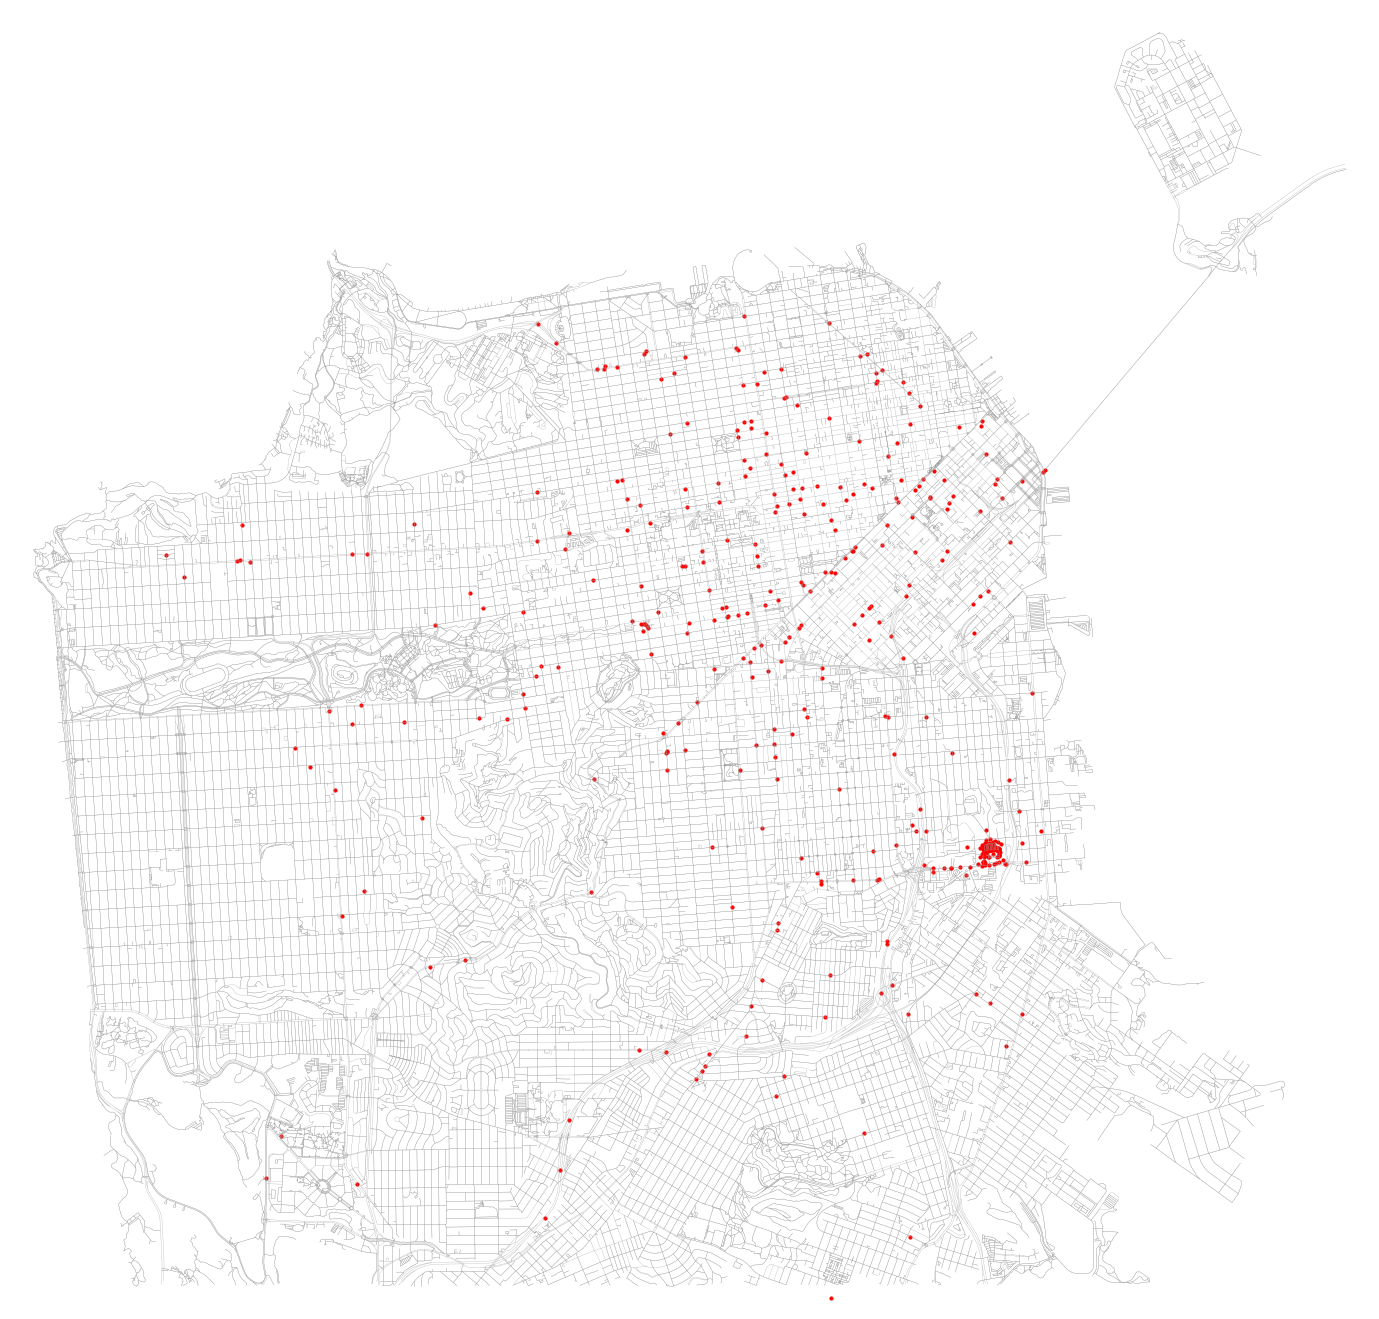

In [12]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(original_starts['longitude'], original_starts['latitude'], c='#ff0000', s=10.0, alpha=1.0)

In [7]:
kde_start = KernelDensity(bandwidth=0.003, metric='haversine')
kde_start.fit(original_starts[['longitude', 'latitude']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.003, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='haversine',
       metric_params=None, rtol=0)

In [8]:
sf_edges = ox.graph_to_gdfs(streets_small, nodes=False, fill_edge_geometry=True)
sf_west, sf_south, sf_east, sf_north = sf_edges.total_bounds

In [9]:
# Create evaluation grid
xgrid = np.linspace(sf_west, sf_east, 300)
ygrid = np.linspace(sf_south, sf_north, 300)
xs, ys = np.meshgrid(xgrid, ygrid)

xys = np.vstack([xs.ravel(), ys.ravel()]).T

In [10]:
# Evaluate on the grid
zs = np.exp(kde_start.score_samples(xys))
zs = zs.reshape(xs.shape)

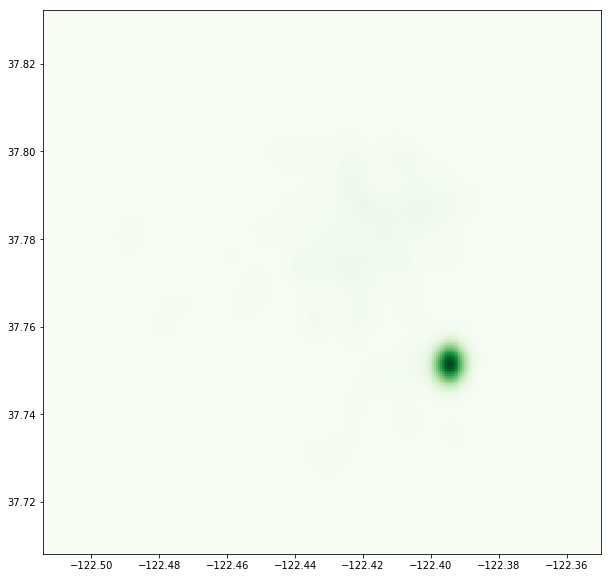

In [11]:
plt.figure(figsize=(10, 10))
plt.pcolormesh(xs, ys, zs, cmap=plt.cm.Greens)

In [13]:
start_starts = kde_start.sample(500)

In [14]:
start_starts[:5]

array([[-122.39150635,   37.75645146],
       [-122.4285035 ,   37.7602734 ],
       [-122.40190247,   37.77470674],
       [-122.40520308,   37.78701092],
       [-122.47070172,   37.77456542]])

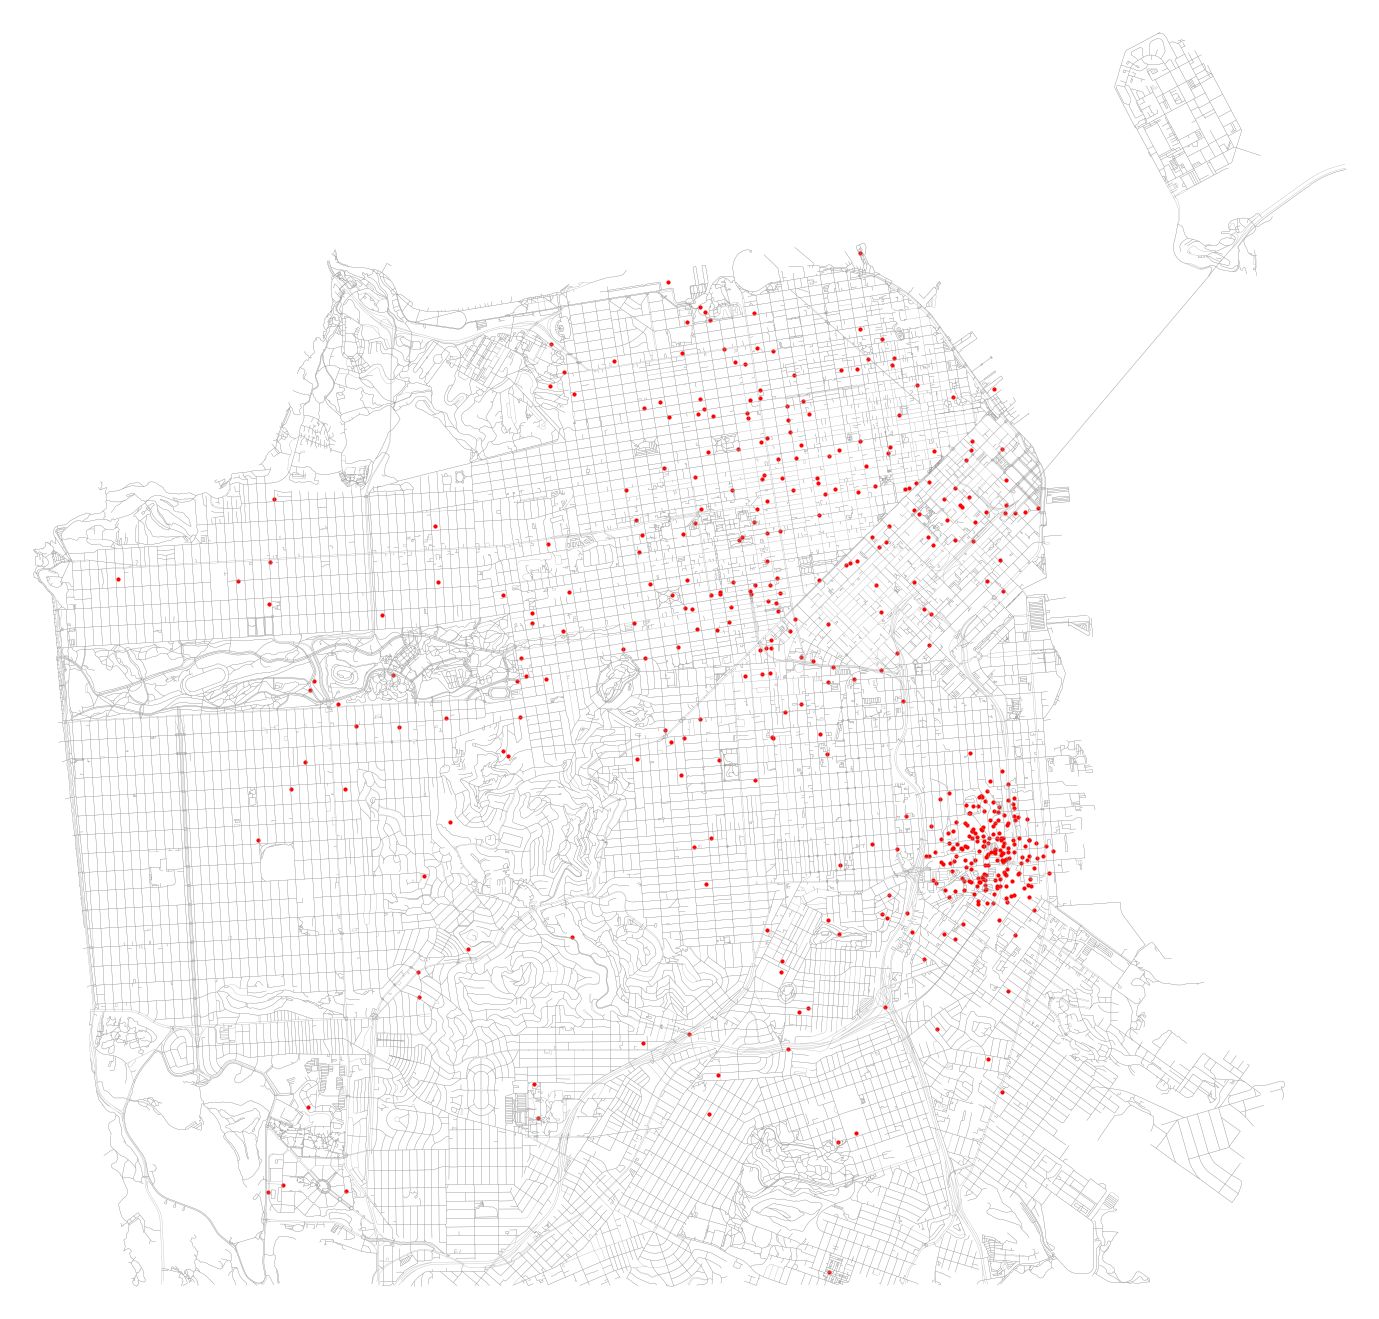

In [15]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(start_starts[:, 0], start_starts[:, 1], c='#ff0000', s=10.0, alpha=1.0)

In [21]:
original_starts['float_time'] = (original_starts['time'] - original_starts['time'].min()).dt.total_seconds()

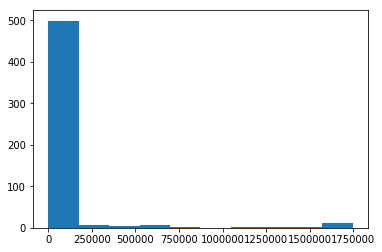

In [22]:
plt.hist(original_starts['float_time'])
plt.show()

In [24]:
kde_spacetime = KernelDensity(bandwidth=0.003)
kde_spacetime.fit(original_starts[['longitude', 'latitude', 'float_time']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.003, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [26]:
start_spacetime = kde_spacetime.sample(500)

In [27]:
start_spacetime[:5]

array([[-1.22400521e+02,  3.77586159e+01,  3.19868039e-03],
       [-1.22480335e+02,  3.77543906e+01,  1.00003113e+01],
       [-1.22387240e+02,  3.77508448e+01,  3.15400034e+04],
       [-1.22482500e+02,  3.77126343e+01,  5.09992304e+01],
       [-1.22422963e+02,  3.77736184e+01,  2.00022219e+01]])

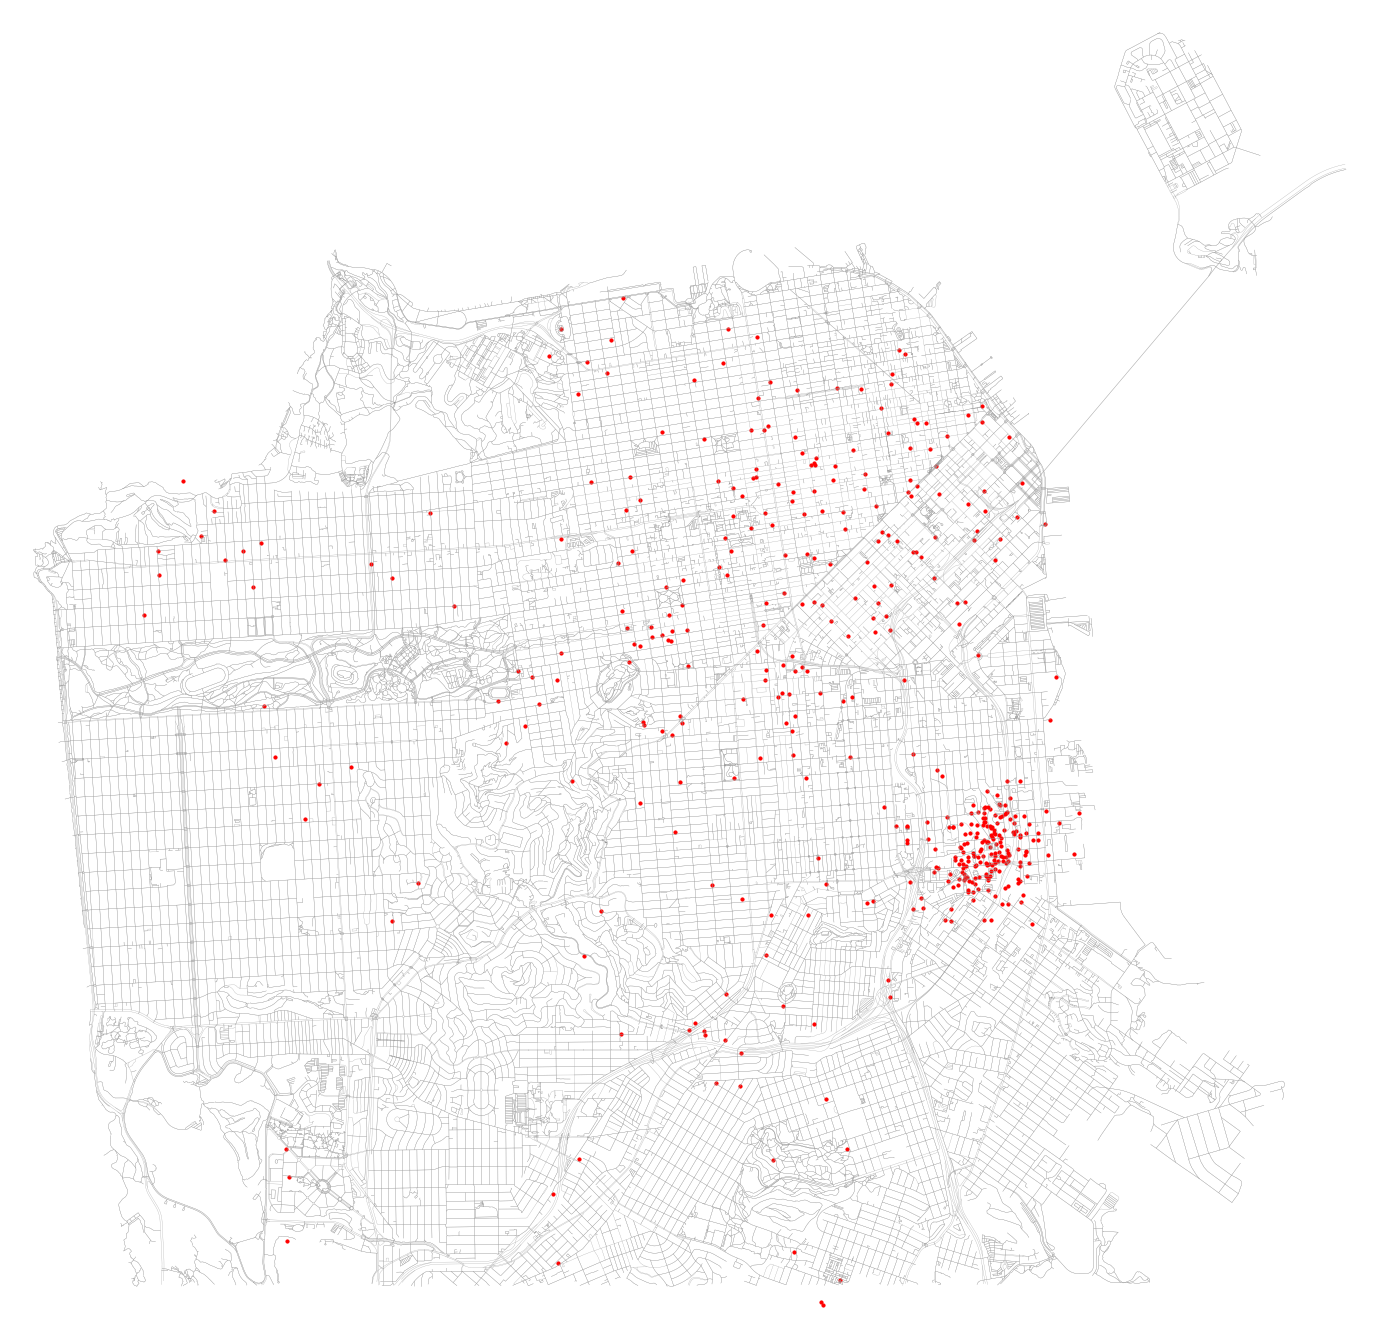

In [28]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(start_spacetime[:, 0], start_spacetime[:, 1], c='#ff0000', s=10.0, alpha=1.0)

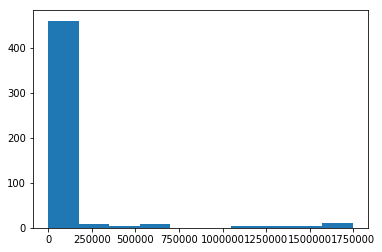

In [29]:
plt.hist(start_spacetime[:, 2])
plt.show()

In [30]:
kde_spacetime_hb = KernelDensity(bandwidth=0.00003)
kde_spacetime_hb.fit(original_starts[['longitude', 'latitude', 'float_time']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=3e-05, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [31]:
start_spacetime_hb = kde_spacetime_hb.sample(500)

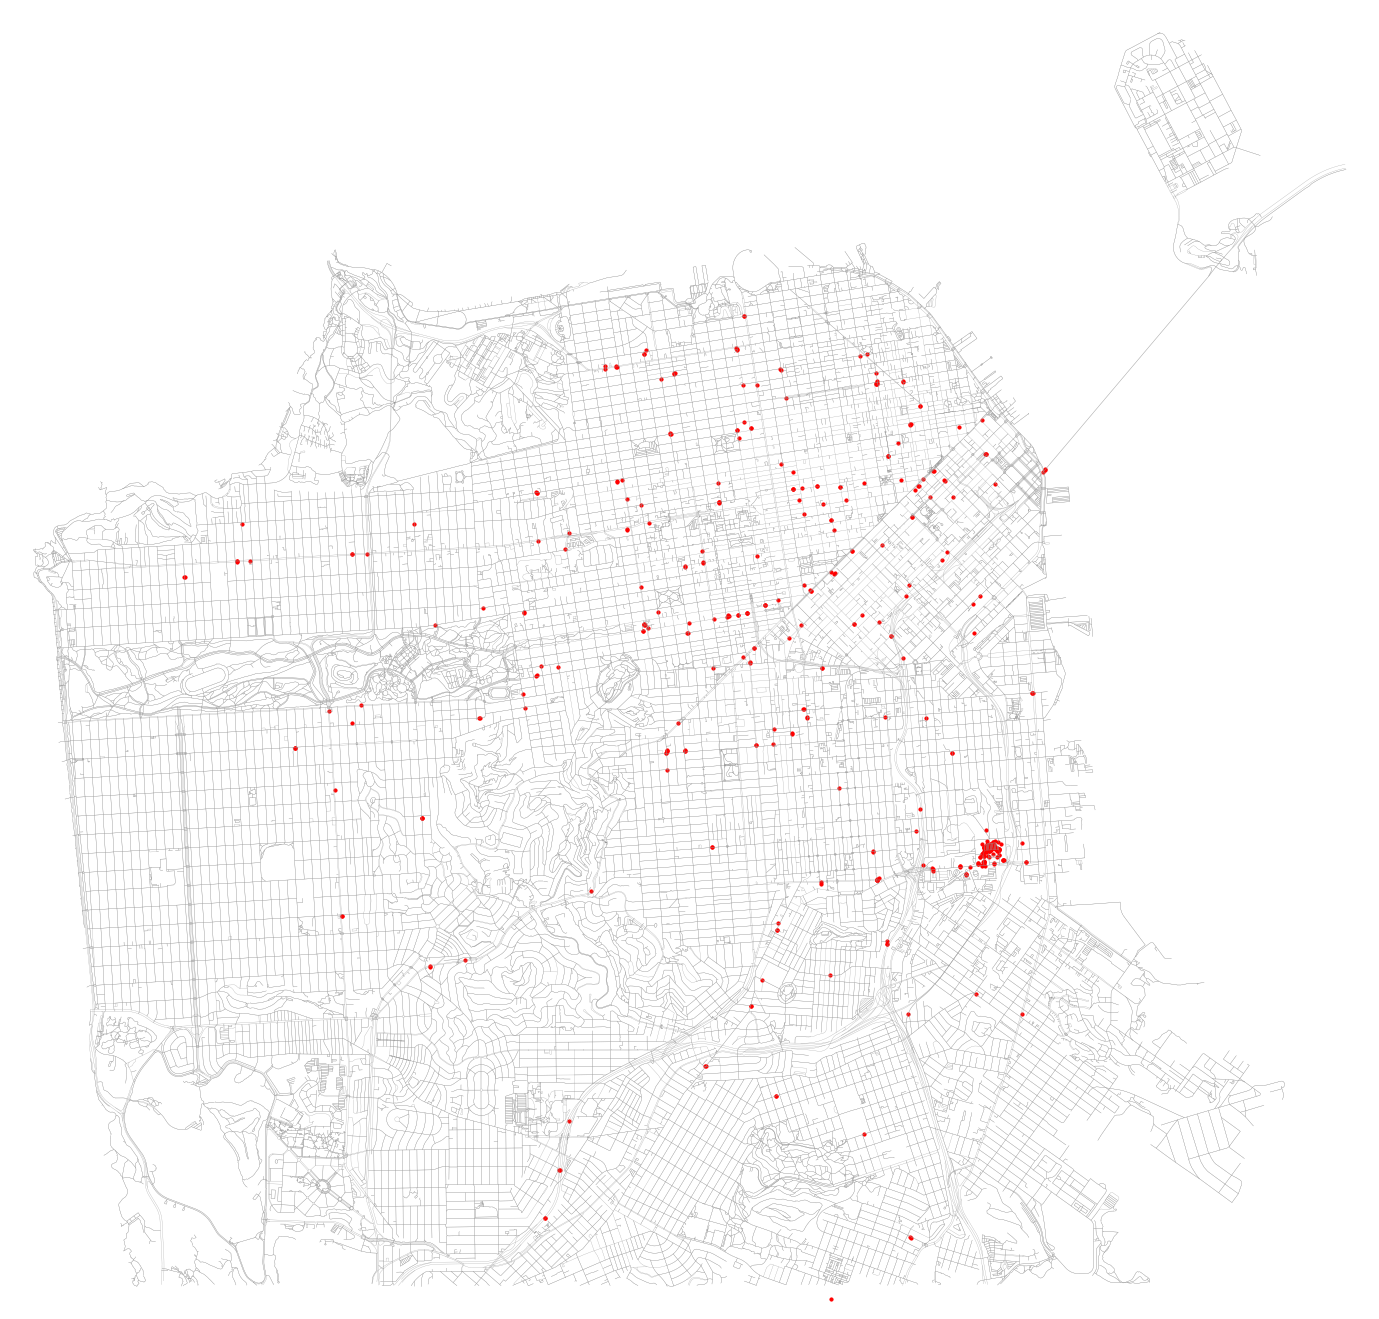

In [32]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(start_spacetime_hb[:, 0], start_spacetime_hb[:, 1], c='#ff0000', s=10.0, alpha=1.0)

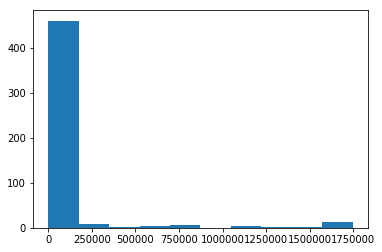

In [33]:
plt.hist(start_spacetime_hb[:, 2])
plt.show()

In [35]:
kde_spacetime_hb_light = KernelDensity(bandwidth=0.00003)
kde_spacetime_hb_light.fit(original_starts[['longitude', 'latitude']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=3e-05, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [36]:
# Evaluate on the grid
zs_hb = np.exp(kde_spacetime_hb_light.score_samples(xys))
zs_hb = zs_hb.reshape(xs.shape)

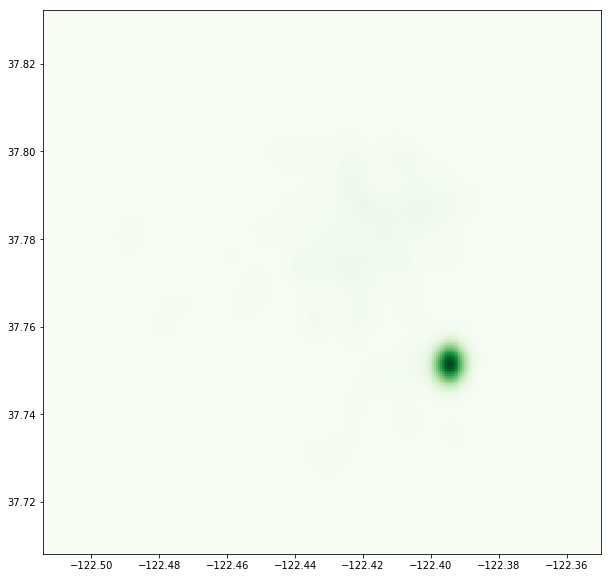

In [37]:
plt.figure(figsize=(10, 10))
plt.pcolormesh(xs, ys, zs, cmap=plt.cm.Greens)